* Predict the number of
passengers based on passengers in the previous time period (previous month).

In [1]:
# from https://github.com/FinYang/tsdl/blob/56e091544cb81e573ee6db20c6f9cd39c70e6243/data-raw/boxjenk/seriesg.dat

In [2]:
values = [         
  112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104., 118., 115., 126.,
  141., 135., 125., 149., 170., 170., 158., 133., 114., 140., 145., 150., 178., 163.,
  172., 178., 199., 199., 184., 162., 146., 166., 171., 180., 193., 181., 183., 218.,
  230., 242., 209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264., 272.,
  237., 211., 180., 201., 204., 188., 235., 227., 234., 264., 302., 293., 259., 229.,
  203., 229., 242., 233., 267., 269., 270., 315., 364., 347., 312., 274., 237., 278.,
  284., 277., 317., 313., 318., 374., 413., 405., 355., 306., 271., 306., 315., 301.,
  356., 348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318., 362., 348.,
  363., 435., 491., 505., 404., 359., 310., 337., 360., 342., 406., 396., 420., 472.,
  548., 559., 463., 407., 362., 405., 417., 391., 419., 461., 472., 535., 622., 606.,
  508., 461., 390., 432.,
 ]

In [3]:
import pandas as pd
idx = pd.date_range("1949-01-01", periods=len(values), freq="M")

In [4]:
passengers = pd.Series(values, index=idx, name="passengers").to_frame()

* Split dataset into training and test sets.
* Learn based on the first 75% of the dataset – this is the default value for the test_size parameter in the train_test_split function.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(passengers, passengers.passengers.shift(-1), shuffle=False)

* Set some imports and set a couple of global constants.
* Define our model in this function.
* With the Keras functional API, define a two-layer neural network, where
the hidden layer of HIDDEN_NEURONS neurons is activated by the Rectified Linear Unit (ReLU) function.

In [6]:
import tensorflow.keras as keras
import tensorflow as tf

DROPOUT_RATIO = 0.2
HIDDEN_NEURONS = 10

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

def create_model(passengers):
  input_layer = keras.layers.Input(len(passengers.columns))

  hiden_layer = keras.layers.Dropout(DROPOUT_RATIO)(input_layer)
  hiden_layer = keras.layers.Dense(HIDDEN_NEURONS, activation='relu')(hiden_layer)

  output_layer = keras.layers.Dropout(DROPOUT_RATIO)(hiden_layer)
  output_layer = keras.layers.Dense(1)(output_layer)

  model = keras.models.Model(inputs=input_layer, outputs=output_layer)

  model.compile(loss='mse', optimizer=keras.optimizers.Adagrad(),
    metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()])
  return model

model = create_model(passengers)

* Train naïve FCN.

In [7]:
model.fit(X_train, y_train, epochs=1000, callbacks=[callback])

Epoch 1/1000
4/4 [==============================] - 1s 4ms/step - loss: 76259.4766 - root_mean_squared_error: 276.1512 - mean_absolute_error: 257.4671
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 73779.2422 - root_mean_squared_error: 271.6234 - mean_absolute_error: 253.7078
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 75126.3828 - root_mean_squared_error: 274.0919 - mean_absolute_error: 256.2210
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 74735.7891 - root_mean_squared_error: 273.3785 - mean_absolute_error: 254.5911
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 70855.0078 - root_mean_squared_error: 266.1860 - mean_absolute_error: 250.3132
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 73684.4844 - root_mean_squared_error: 271.4489 - mean_absolute_error: 254.9658
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 70155.1172 - root_mean

* Get the predictions for the test set.

In [8]:
predicted = model.predict(X_test)

* Visualize passenger predictions against the actual
passenger values via this function.

In [9]:
import matplotlib.pyplot as plt

def show_result(y_test, predicted):
  plt.figure(figsize=(16, 6))
  plt.plot(y_test.index, predicted, 'o-', label="predicted")
  plt.plot(y_test.index, y_test, '.-', label="actual")

  plt.ylabel("Passengers")
  plt.legend()

* Visualize predictions.

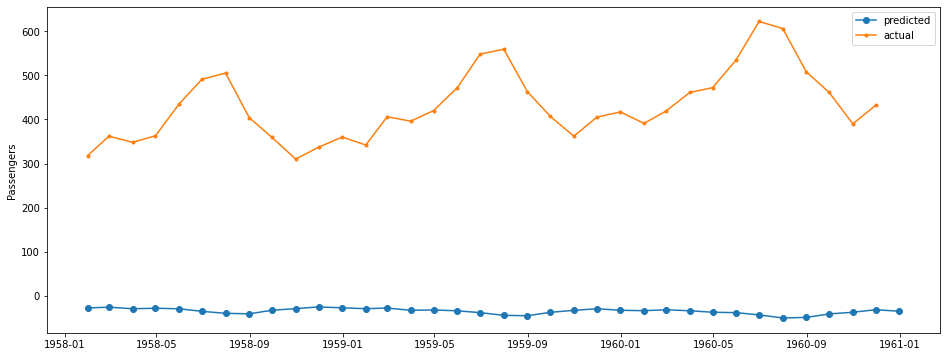

In [10]:
show_result(y_test, predicted)

* Add month and year columns to the DataFrame based on the
DateTimeIndex.
* Redefine model – need to add more input columns.

In [11]:
passengers["month"] = passengers.index.month.values
passengers["year"] = passengers.index.year.values

model = create_model(passengers)
X_train, X_test, y_train, y_test = train_test_split(passengers, passengers.passengers.shift(-1), shuffle=False)
model.fit(X_train, y_train, epochs=100, callbacks=[callback])
predicted = model.predict(X_test)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 621279.2500 - root_mean_squared_error: 788.2127 - mean_absolute_error: 666.7724
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 497143.0000 - root_mean_squared_error: 705.0837 - mean_absolute_error: 595.9124
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 486256.5312 - root_mean_squared_error: 697.3210 - mean_absolute_error: 585.4208
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 573553.5625 - root_mean_squared_error: 757.3332 - mean_absolute_error: 640.8909
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 527537.3750 - root_mean_squared_error: 726.3177 - mean_absolute_error: 608.9769
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 487661.8750 - root_mean_squared_error: 698.3279 - mean_absolute_error: 601.5965


* See how well the model predictions match the test data.

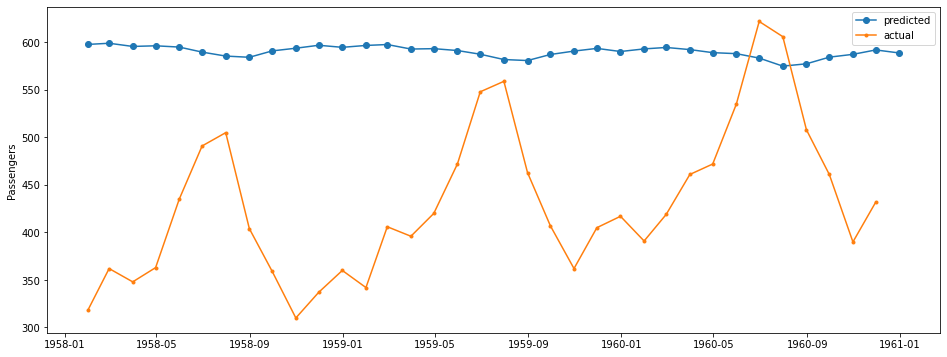

In [12]:
show_result(y_test, predicted)

* Create a less naïve version, change a few things in this model.
  - add an embedding of the month feature.
  - treat the year as a linear predictor.
  - add the previous month's passengers to predictions.
  - scale predictions based on the standard deviation in the
training dataset.

In [13]:
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow as tf


DROPOUT_RATIO = 0.1
HIDDEN_NEURONS = 5


def create_model(passengers):
  scale = tf.constant(passengers.passengers.std())

  continuous_input_layer = keras.layers.Input(shape=1)

  categorical_input_layer = keras.layers.Input(shape=1)
  embedded = keras.layers.Embedding(12, 5)(categorical_input_layer)
  embedded_flattened = keras.layers.Flatten()(embedded)

  year_input = keras.layers.Input(shape=1)
  year_layer = keras.layers.Dense(1)(year_input)

  hidden_output = keras.layers.Concatenate(-1)([embedded_flattened, year_layer, continuous_input_layer])
  output_layer = keras.layers.Dense(1)(hidden_output)
  output = output_layer * scale + continuous_input_layer

  model = keras.models.Model(inputs=[
    continuous_input_layer, categorical_input_layer, year_input
  ], outputs=output)

  model.compile(loss='mse', optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.MeanAbsoluteError()])
  return model

In [14]:
passengers = pd.Series(values, index=idx, name="passengers").to_frame()
passengers["year"] = passengers.index.year.values - passengers.index.year.values.min()
passengers["month"] = passengers.index.month.values - 1

X_train, X_test, y_train, y_test = train_test_split(passengers, passengers.passengers.shift(-1), shuffle=False)
model = create_model(X_train)
model.fit(
  (X_train["passengers"], X_train["year"], X_train["month"]),
  y_train, epochs=1000,
  callbacks=[callback]
)
predicted = model.predict((X_test["passengers"], X_test["year"], X_test["month"]))

Epoch 1/1000
4/4 [==============================] - 1s 4ms/step - loss: 91939536.0000 - root_mean_squared_error: 9588.5107 - mean_absolute_error: 9034.6416
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 90224392.0000 - root_mean_squared_error: 9498.6523 - mean_absolute_error: 8950.1445
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 88581280.0000 - root_mean_squared_error: 9411.7627 - mean_absolute_error: 8867.1455
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 86890992.0000 - root_mean_squared_error: 9321.5342 - mean_absolute_error: 8782.8662
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 85307016.0000 - root_mean_squared_error: 9236.1797 - mean_absolute_error: 8700.9570
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 83669880.0000 - root_mean_squared_error: 9147.1240 - mean_absolute_error: 8617.6211
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step 

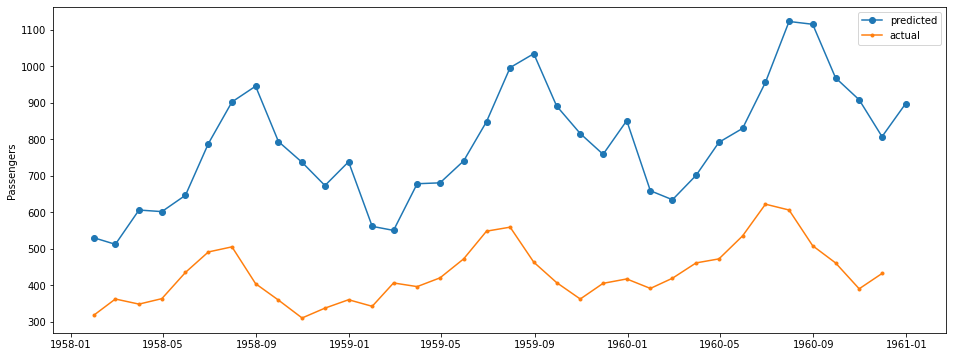

In [15]:
show_result(y_test, predicted)